In [2]:
import urllib
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline    

In [8]:
from PIL import Image
import numpy

In [6]:
list_records = []
for i in range(1, 11):
    params = urllib.parse.urlencode({'page':i})
    url = 'https://movie.naver.com/movie/point/af/list.nhn?&%s' % params
    response = urllib.request.urlopen(url)
    navigator = BeautifulSoup(response, 'html.parser')
    table = navigator.find('table', class_ = 'list_netizen')
    
    for i, r in enumerate(table.find_all('tr')):
        for j, c in enumerate(r.find_all('td')):
            if j == 0:
                record = {'번호' : int(c.text.strip())}
            elif j == 1:
                record.update({'영화' : str(c.find('a').text.strip())})
                record.update({'140자 평' : str(c.text.strip()).replace('\n', '').replace('\t', '')})
                record['140자 평'] = record['140자 평'][len(record['영화']):-2]
            elif j == 2:
                record.update({'글쓴이' : c.find('a', class_ = 'author').text.strip()})
                record.update({'날짜' : str(c.text).split('****')[1]})
        try:
            list_records.append(record)
        except:
            pass
data = pd.DataFrame(list_records)
data.head()

,140자 평,글쓴이,날짜,번호,영화
0,단순 재미 영화가 아니다딥 다크의 절정체 깊이감 최고,wwfl****,19.10.04,16234549,조커
1,대단해 한편의 예술영화,dkst****,19.10.04,16234655,조커
2,즐겁게 시간 죽이기 영화 좋아요,seoj****,19.10.04,16234654,퍼펙트맨
3,가장 객관적으로 감상평을 하겠다. 썩 재밌는 영화는 아니다. 그런데 영화를 끝까지 ...,jeon****,19.10.04,16234653,조커
4,쏘쏘ㅡ나름재밌어ㅡ조진웅이 다했어.,see5****,19.10.04,16234652,퍼펙트맨


In [12]:
def displayWordCloud(data, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = './NanumPen.ttf',
                        background_color = backgroundcolor,
                        width = width, height = height).generate(data)
    print(wordcloud.words_)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

{'영화': 1.0, '연기': 0.4583333333333333, '영화가': 0.375, '너무': 0.375, '그냥': 0.3333333333333333, '정말': 0.3333333333333333, '진짜': 0.2916666666666667, '한번': 0.25, '이런': 0.20833333333333334, '없는': 0.20833333333333334, '최고': 0.16666666666666666, '영화를': 0.16666666666666666, '사람은': 0.16666666666666666, '조커': 0.16666666666666666, '많은': 0.16666666666666666, '조커를': 0.16666666666666666, '한편의': 0.125, '영화는': 0.125, '끝까지': 0.125, '하는': 0.125, '것이다': 0.125, '무섭다': 0.125, '연기가': 0.125, '뛰어넘었다': 0.125, '제일': 0.125, '그리고': 0.125, '보고': 0.125, '다시': 0.125, '조커에': 0.125, '재미가': 0.125, '조커가': 0.125, '밖에': 0.125, '처음으로': 0.125, '조커라는': 0.125, '마음에': 0.125, '조커의': 0.125, '대한': 0.125, '단순': 0.08333333333333333, '재미': 0.08333333333333333, '아니다딥': 0.08333333333333333, '다크의': 0.08333333333333333, '절정체': 0.08333333333333333, '깊이감': 0.08333333333333333, '가장': 0.08333333333333333, '아니다': 0.08333333333333333, '보게': 0.08333333333333333, '안보는게': 0.08333333333333333, '좋아하는': 0.08333333333333333, '생각하고': 0.08333333333333333

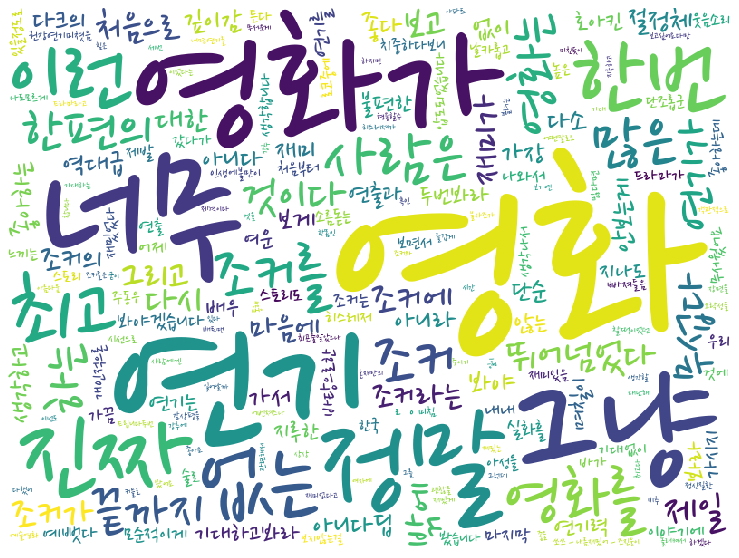

Wall time: 844 ms


In [13]:
%time displayWordCloud(' '.join(data['140자 평']))

In [20]:
img = Image.open('apple.png') 
img_array=numpy.array(img)

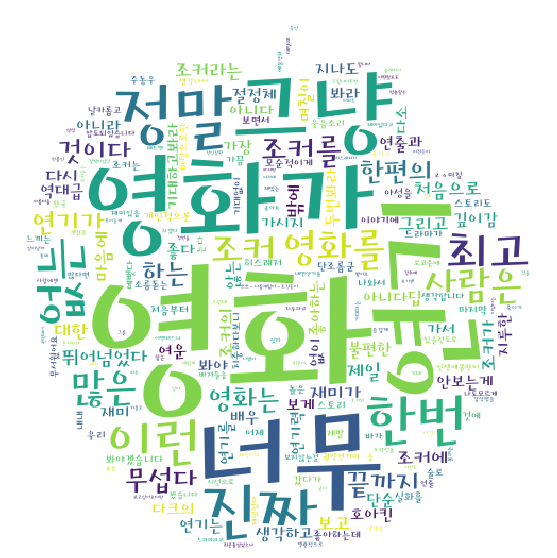

In [21]:
wordcloud = WordCloud(font_path = './HoonMakdaeyunpilR.ttf', 
                      background_color = 'white', 
                      mask=img_array,  
                      width = 800, height = 600).generate(' '.join(data['140자 평']))
plt.figure(figsize = (15 , 10)) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()